In [1]:
# import the stuff
from cetsp.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution

In [2]:
# create a simple instance

import random
circles = [Circle(Point(x*1, y*1), 1) for x in range(9) for y in range(10)]
instance = Instance(circles)

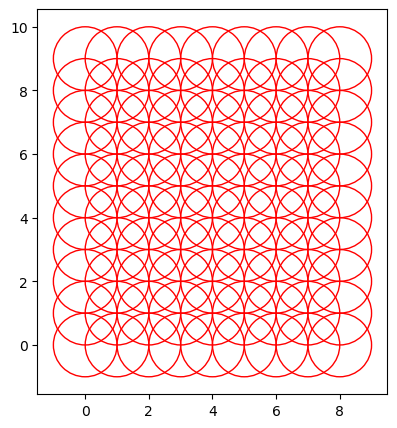

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [4]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


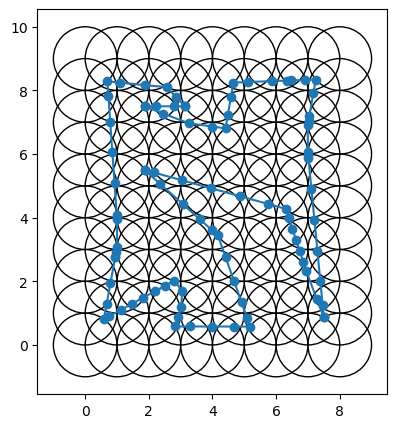

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution)

In [6]:
initial_solution.length()

46.51980771699073

Using ChFarthestCircle-Branching
Starting with root node of size 4
i	LB	|	UB
0	29.5221	|	46.5198
1	29.5221	|	46.5198
2	29.5221	|	46.5198
3	29.5221	|	46.5198
4	29.5221	|	46.5198
5	29.5221	|	46.5198
6	29.5221	|	46.5198
crossing prune!
7	29.5221	|	46.5198
8	29.5221	|	46.5198
9	29.5221	|	46.5198


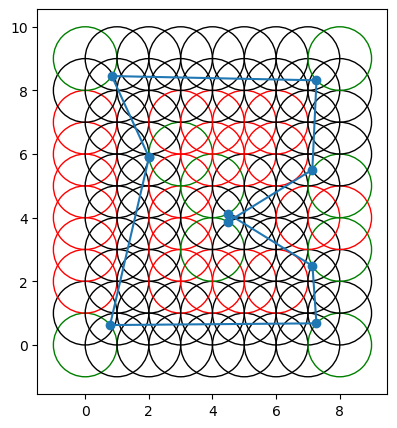

crossing prune!
10	29.5221	|	46.5198


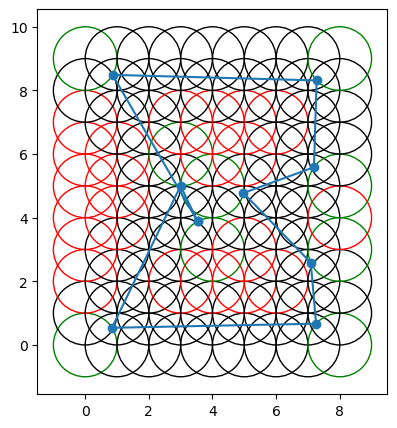

crossing prune!


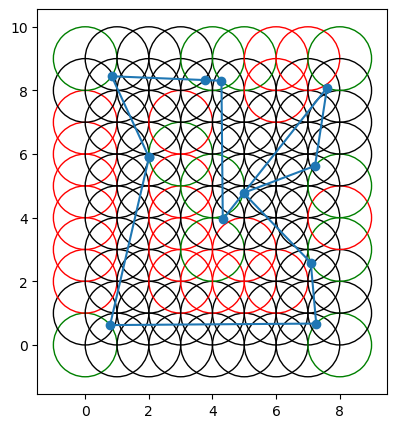

crossing prune!


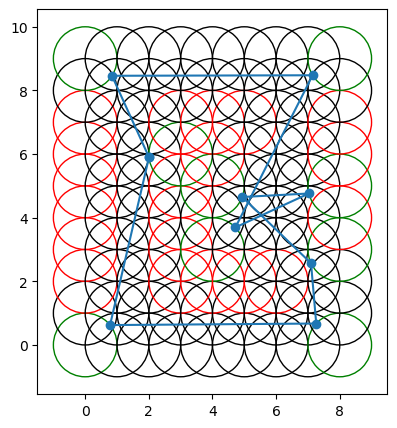

20	29.5221	|	46.5198
30	29.5221	|	46.5198
40	29.5221	|	46.5198
crossing prune!


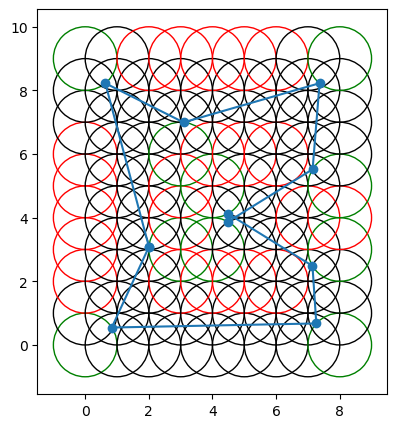

50	29.5221	|	46.5198
crossing prune!


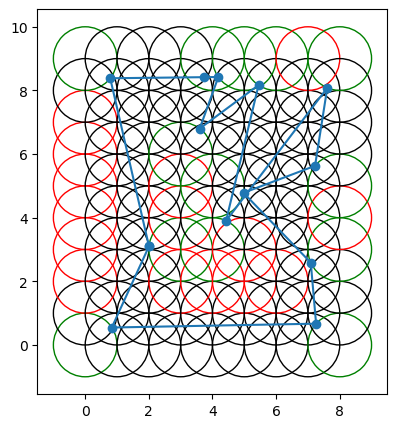

crossing prune!


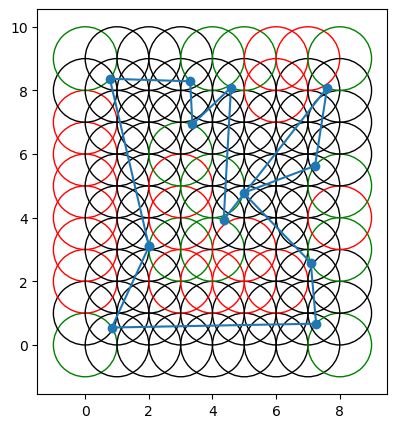

60	29.5221	|	46.5198
crossing prune!


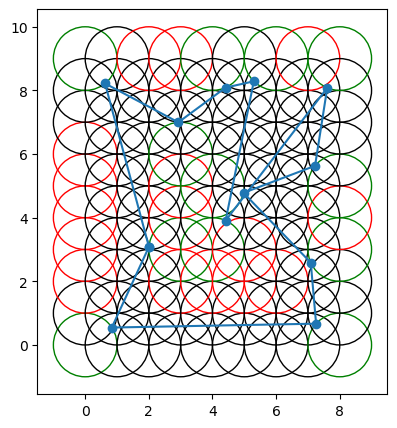

70	29.5221	|	46.5198
crossing prune!


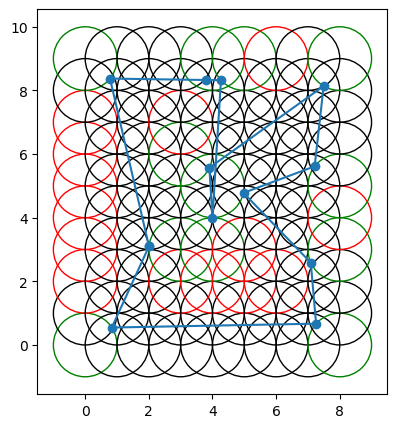

crossing prune!


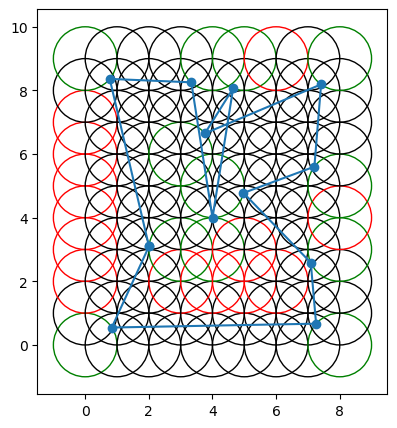

crossing prune!


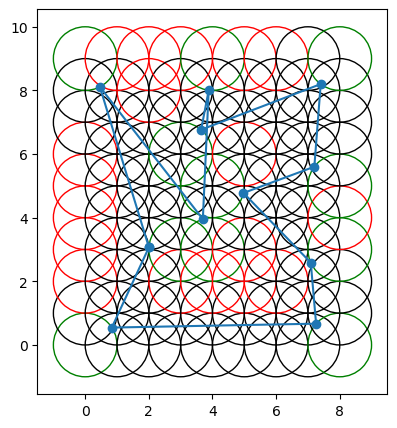

crossing prune!


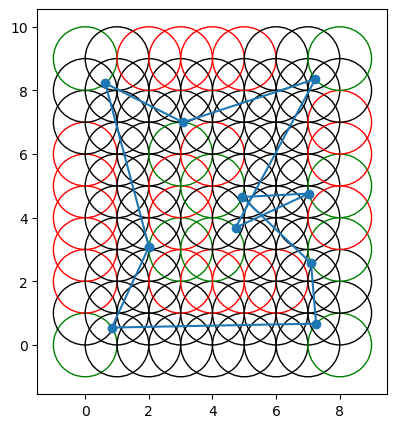

80	29.5221	|	46.5198
90	29.5221	|	46.5198
100	29.5221	|	37.0979
crossing prune!


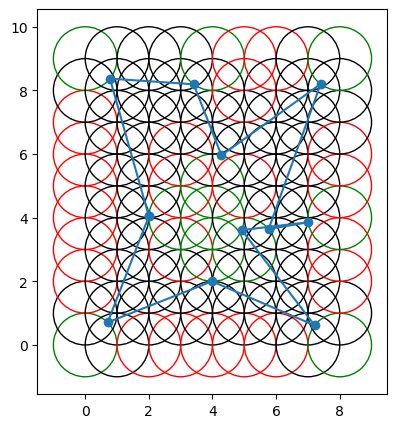

crossing prune!


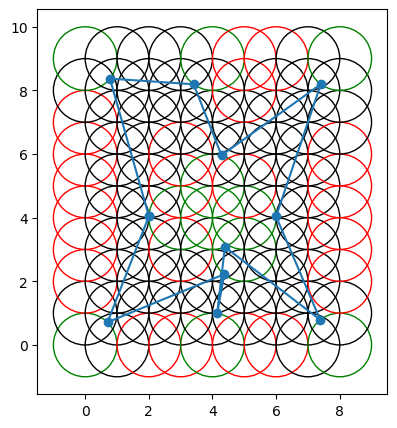

200	30.5862	|	37.0979
300	30.5863	|	36.6355
400	30.5863	|	36.6355
500	30.5863	|	36.6355
crossing prune!


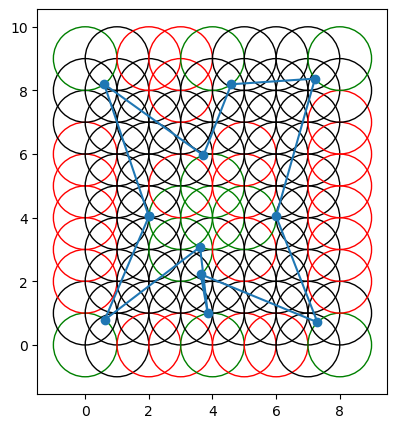

600	30.8283	|	35.7526
700	30.8283	|	35.7526
crossing prune!


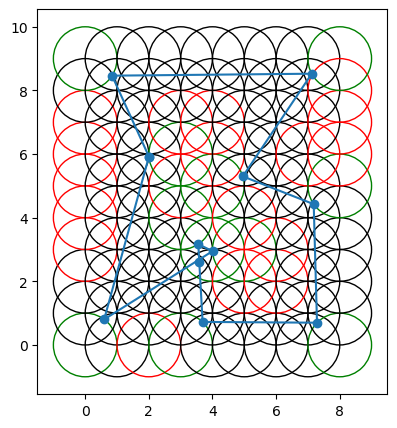

crossing prune!


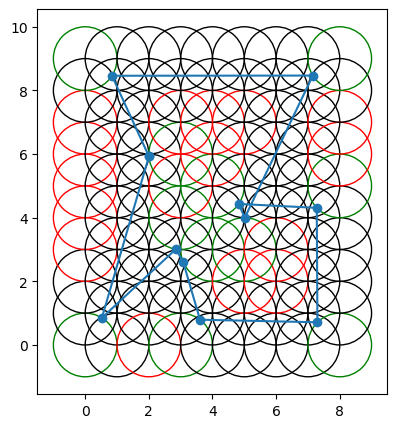

crossing prune!


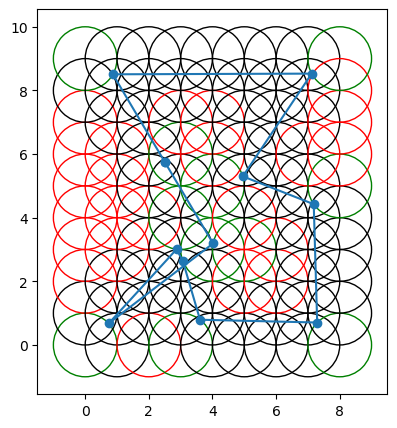

crossing prune!


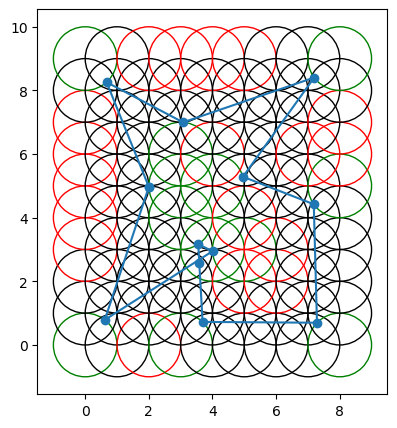

crossing prune!


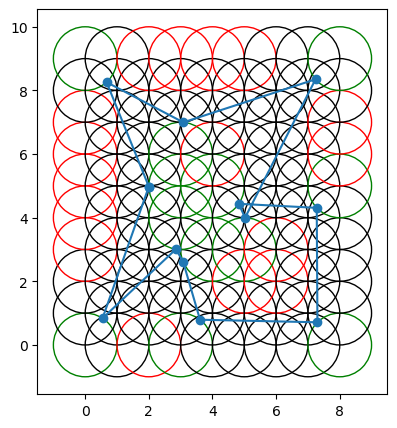

800	30.8283	|	35.7526
900	30.8283	|	35.7526
crossing prune!


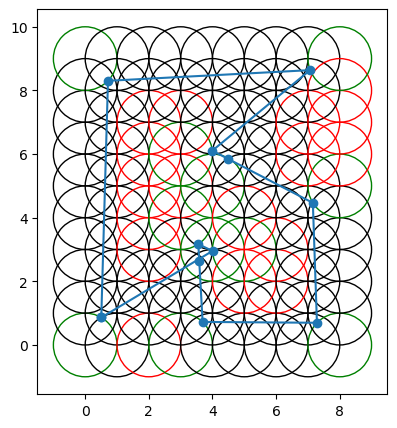

1000	30.8283	|	35.7526
crossing prune!


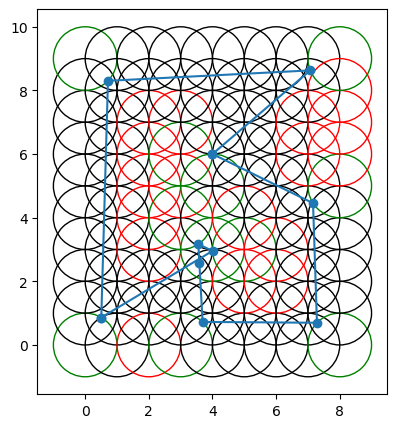

crossing prune!


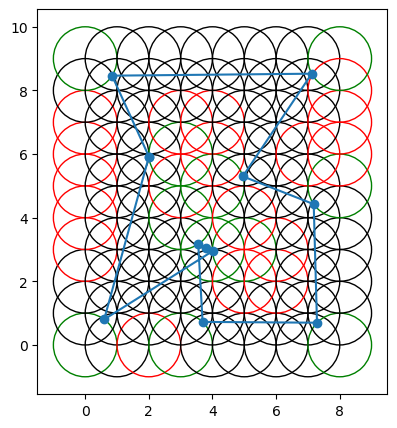

crossing prune!


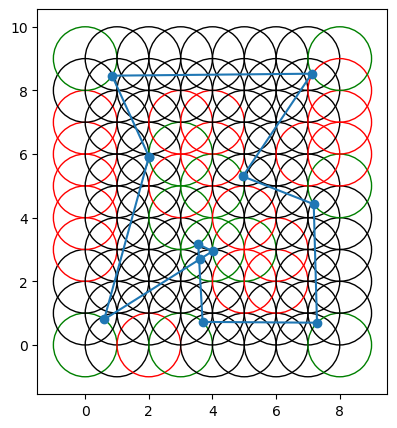

crossing prune!


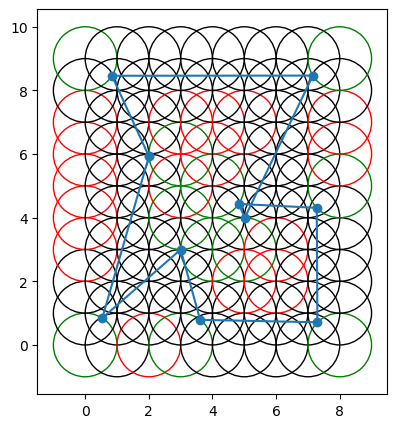

crossing prune!


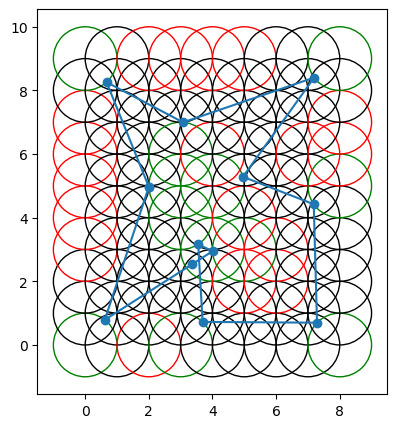

crossing prune!


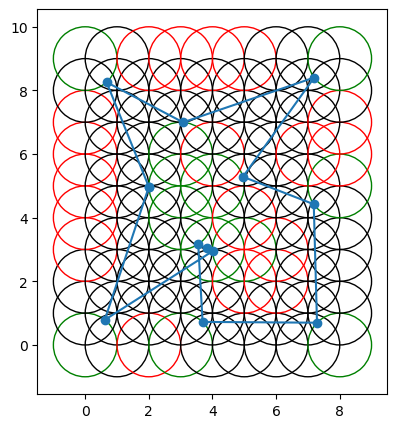

crossing prune!


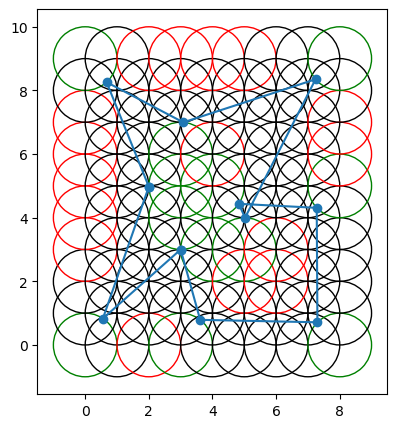

crossing prune!


In [ ]:
timelimit = 120
num_nodes_explored = 0
ub, lb = None, None
def count(event):
    global num_nodes_explored
    global ub
    global lb
    num_nodes_explored += 1
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    if not event.current_node.get_relaxed_solution().is_simple():
        print("crossing prune!")
        plt.figure(figsize=(5, 5))
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.show()
        event.current_node.prune()
opt_solution = branch_and_bound(instance, count, initial_solution, timelimit)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)

In [ ]:
num_nodes_explored, lb, ub